In [2]:
import mols2grid
#import gdown
import os
import numpy as np
#os.chdir('/Users/kate_fieseler/PycharmProjects/postera/CAR_recipe')
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from IPython.display import display, Image
import time
import random
import pandas as pd
import csv
import sqlite3
import pickle
from sqlitedict import SqliteDict
import seaborn as sns
import csv
import ast
import sys
from collections import OrderedDict
import random

ModuleNotFoundError: No module named 'mols2grid'

In [3]:
pattern = AllChem.ReactionFromSmarts('[#6:1](=[#8:2])-[#8;H1].[#7;H3,H2,H1:3]>>[#6:1](=[#8:2])-[#7:3]')
pattern

NameError: name 'AllChem' is not defined

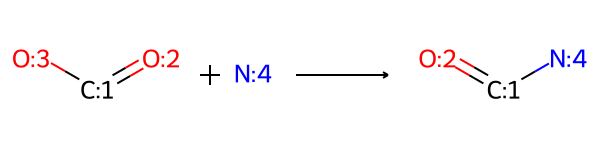

In [4]:
amid_pattern = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OH1:3].[N:4]>>[C:1](=[O:2])-[N:4]')
amid_pattern

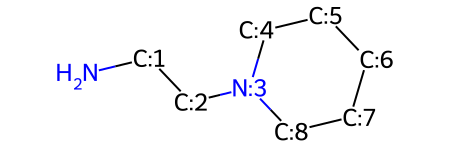

In [7]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions

def add_atom_map_based_on_index(mol):
    """
    Add atom map numbers to a molecule based on atom index.

    :param mol: RDKit Mol object
    """
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())

# Define the reactants and product
reactant1_smiles = "NCCN1CCCCC1"
reactant2_smiles = "CC1CCC(=CC(=O)O)C1"
product_smiles = "CC1CCC(=CC(=O)NCCN2CCCCC2)C1"

# Define the reaction SMARTS pattern
reaction_smarts = "[#6:1](=[#8:2])-[#8].[#7;H3,H2,H1:3]>>[#6:1](=[#8:2])-[#7:3]"
reaction = rdChemReactions.ReactionFromSmarts(reaction_smarts)

# Convert SMILES to RDKit molecules
reactant1 = Chem.MolFromSmiles(reactant1_smiles)
reactant2 = Chem.MolFromSmiles(reactant2_smiles)
product = Chem.MolFromSmiles(product_smiles)

add_atom_map_based_on_index(reactant1)
add_atom_map_based_on_index(reactant2)
add_atom_map_based_on_index(product)

reactant1


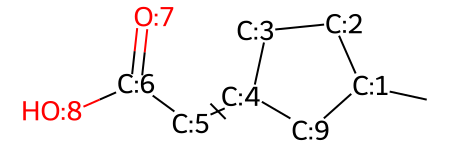

In [8]:
reactant2

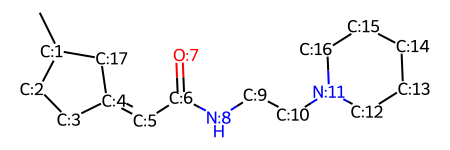

In [9]:
product

In [ ]:
# Run the reaction
products = reaction.RunReactants((reactant2, reactant1))

# Find attachment indices
for prod in products:
    prod = prod[0]
    for atom in prod.GetAtoms():
        map_num = atom.GetProp('molAtomMapNumber')
        attachment_idx = atom.GetIdx()
        print(f"Attachment point {map_num}: Atom index {attachment_idx} in the product")